In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Sep-publictripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Jan-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Feb-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Jun-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Apr-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Aug-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Oct-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Nov-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-May-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Dec-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Mar-tripdata.csv
/kaggle/input/google-case-study-1-data-set-cyclist-bike-share/2022-Jul

## Google Data Analytics - Bike-Share Case Study

How Does a Bike-Share Navigate Speedy Success?

# Scenario


I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of
marketing believes the future success of the company depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will
design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your
recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# Phase 1 - Ask

Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Phase 2 - Prepare


The data used for the case study was provided by google and you can access at this [link](https://divvy-tripdata.s3.amazonaws.com/index.html). This is public data that you can use to explore how different customer types are using
Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that
you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or
if they have purchased multiple single passes.index.html). The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). The data I decided to use was January 2022 through December 2022. The data is provided by a proper source and has been validated under a license making this a suitable dataset for the case-study.

# Phase 3 - Process

##### Tools Used for Case-Study

* #### Python




##### **Why**? 

* Python: I decided to use Python because I'd be able to manipulate the data with pandas and visualize it utilizing Matplotlib and Seaborn.

## Lets Process!

Since the data consisits of 12 different datasets to represent each month in 2022. I will merge the files along with
cleaning the data.


In [3]:
# Loading Packages for the case-study

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the datasets

In [4]:
# Importing the data

jan_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Jan-tripdata.csv")

feb_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Feb-tripdata.csv")

mar_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Mar-tripdata.csv")

apr_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Apr-tripdata.csv")

may_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-May-tripdata.csv")

jun_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Jun-tripdata.csv")

jul_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Jul-tripdata.csv")

aug_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Aug-tripdata.csv")

sep_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Sep-publictripdata.csv")

oct_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Oct-tripdata.csv")

nov_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Nov-tripdata.csv")

dec_2022 = pd.read_csv("../input/google-case-study-1-data-set-cyclist-bike-share/2022-Dec-tripdata.csv")


In [5]:
# Combining the data using the concat function

bike_data = pd.concat([jan_2022,feb_2022,mar_2022,
                       apr_2022,may_2022,jun_2022,
                       jul_2022,aug_2022,sep_2022,oct_2022
                       ,nov_2022,dec_2022],
                      ignore_index = True)

## Understanding the Combined Data

In [6]:
print("Shape of dataset  ",bike_data.shape)
print("# of columns in dataset  ",'{:,}'.format(bike_data.shape[0]))
print("# of rows in dataset  ",bike_data.shape[1])

Shape of dataset   (5667717, 13)
# of columns in dataset   5,667,717
# of rows in dataset   13


In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [8]:
# Viewing the top 10 rows of the dataset


bike_data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.861251,-87.656500,41.883380,-87.641170,member
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,TA1309000004,Clinton St & Washington Blvd,WL-012,41.878166,-87.631929,41.883380,-87.641170,member


## Data Cleaning Process

In [9]:
# First Lets look at the null values and adding them using .sum()
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [10]:
# Diving into null to decide if fill data or drop. Appears we can drop all together.
bike_data[bike_data["start_station_name"].isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.950687,-87.668700,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.950687,-87.668700,member
1079,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member
1080,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667322,A53A821B6A869C19,electric_bike,2022-12-14 19:45:37,2022-12-14 19:56:25,NaN,NaN,Public Rack - Woodlawn Ave & 63rd St N,951,41.80,-87.60,41.780000,-87.600000,casual
5667323,96AA5A684782CDB9,electric_bike,2022-12-08 14:18:35,2022-12-08 14:28:19,NaN,NaN,Seeley Ave & Roscoe St,13144,41.94,-87.66,41.943403,-87.679618,casual
5667324,51BE43187C287458,electric_bike,2022-12-06 07:53:15,2022-12-06 08:01:47,NaN,NaN,Clinton St & Tilden St,13037,41.89,-87.66,41.875885,-87.640795,casual
5667325,D34CC635D601EC54,electric_bike,2022-12-09 20:27:25,2022-12-09 20:31:31,NaN,NaN,Clinton St & Tilden St,13037,41.87,-87.64,41.875885,-87.640795,casual


In [11]:
# Getting rid of null values.

bike_data.dropna(inplace=True)
bike_data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
# Lets see new shape of data

print("Shape of dataset  ",bike_data.shape)
print("# of columns in dataset  ",'{:,}'.format(bike_data.shape[0]))
print("# of rows in dataset  ",bike_data.shape[1])

Shape of dataset   (4369360, 13)
# of columns in dataset   4,369,360
# of rows in dataset   13


In [13]:
# Deleting unwanted columns
bike_data = bike_data.drop(['start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1)

In [14]:
# Checling for duplicated data
bike_data.duplicated().sum()

0


Data is clean, no missing values or duplicated data

In [15]:
# Lets view dataframe
bike_data.head(5)

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member


In [16]:
# Lets view data types

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 200.0+ MB


In [17]:
# Converting following columns to datime64 using pd.datetime() function

bike_data["started_at"] = pd.to_datetime(bike_data["started_at"])
bike_data["ended_at"] = pd.to_datetime(bike_data["ended_at"])

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 200.0+ MB


In [18]:
# Creating new column to show the difference in ride times and converting the column to int32
bike_data["duration"] = (bike_data["ended_at"]-bike_data["started_at"])/pd.Timedelta(minutes=1)
bike_data["duration"] = bike_data["duration"].astype("int32")

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   duration       int32         
dtypes: datetime64[ns](2), int32(1), object(3)
memory usage: 216.7+ MB


In [19]:

bike_data.head(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6


In [20]:
# Sorting values by duration in ascending order
bike_data.sort_values(by = "duration")

,ride_id,rideable_type,started_at,ended_at,member_casual,duration
4743742,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,member,-168
1810805,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,member,-129
1636060,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,casual,-127
5394820,B5602D5BB3D517F6,electric_bike,2022-11-06 01:59:05,2022-11-06 01:02:03,member,-57
5322901,1BA46F9F216F5E17,electric_bike,2022-11-06 01:58:11,2022-11-06 01:00:12,casual,-57
...,...,...,...,...,...,...
61039,5AA216F2E2138811,docked_bike,2022-01-13 17:44:13,2022-01-23 15:02:19,casual,14238
23249,5EE2D7C533CCC17B,docked_bike,2022-01-06 19:07:45,2022-01-25 14:30:33,casual,27082
47709,578BA30BA1348F18,docked_bike,2022-01-01 01:00:05,2022-01-21 08:51:11,casual,29271
2996193,DC510E6F98003A94,docked_bike,2022-07-04 18:37:11,2022-07-27 00:32:38,casual,32035


In [21]:
# Counting the number of rows with negative values

bike_data[bike_data["duration"] < 0].count()

ride_id          53
rideable_type    53
started_at       53
ended_at         53
member_casual    53
duration         53
dtype: int64

In [22]:
# Filtering out negative values in duration column
bike_data = bike_data[bike_data["duration"] > 0]
bike_data

,ride_id,rideable_type,started_at,ended_at,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6
...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,member,3
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,member,12
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,member,4
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,member,3


In [23]:
#Checking negative columns to validate
bike_data[bike_data["duration"]<0].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
duration         0
dtype: int64

In [24]:
## Since rows were deleted lets reset the index using the .reset_index() function
bike_data = bike_data.reset_index()

In [25]:
# Pressed enter twice, so dropped index column and duplicate
bike_data.drop(columns=["index"],inplace = True)

In [26]:
# Adding new columns, "weekday","day","month","month_name","year"

bike_data["weekday"] = bike_data["started_at"].dt.day_name()
bike_data["day"] = bike_data["started_at"].dt.day
bike_data["month"] = bike_data["started_at"].dt.month
bike_data["month_name"] = bike_data["started_at"].dt.month_name()
bike_data["year"] = bike_data["started_at"].dt.year

bike_data

,ride_id,rideable_type,started_at,ended_at,member_casual,duration,weekday,day,month,month_name,year
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,Thursday,13,1,January,2022
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,Monday,10,1,January,2022
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,4,Tuesday,25,1,January,2022
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,14,Tuesday,4,1,January,2022
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,6,Thursday,20,1,January,2022
...,...,...,...,...,...,...,...,...,...,...,...
4292704,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,member,3,Monday,5,12,December,2022
4292705,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,member,12,Wednesday,14,12,December,2022
4292706,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,member,4,Thursday,8,12,December,2022
4292707,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,member,3,Wednesday,28,12,December,2022


In [27]:
## Viewing shape after dropping rows

print("New data rows", '{:,}'.format(bike_data.shape[0]))
print("New data columns", '{:,}'.format(bike_data.shape[1]))


New data rows 4,292,709
New data columns 11


In [28]:
bike_data2 = bike_data

In [29]:
# Converting data into Excel file to input into Tableau for the "Share" phase

bike_data2.to_csv(r"C:Desktop\"bike_data_cleaned.csv",index=False)

# Phase 4 - Analyze


In [30]:
bike_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292709 entries, 0 to 4292708
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   duration       int32         
 6   weekday        object        
 7   day            int32         
 8   month          int32         
 9   month_name     object        
 10  year           int32         
dtypes: datetime64[ns](2), int32(4), object(5)
memory usage: 294.8+ MB


In [31]:
# Lets view percentage of users

percentage = round(bike_data["member_casual"].value_counts(normalize = True)*100,1)

percentage

member_casual
member    59.7
casual    40.3
Name: proportion, dtype: float64

In [32]:
# Average duration per month member vs casual
bike_data.groupby(["member_casual","weekday"]).duration.mean()

member_casual  weekday  
casual         Friday       22.206749
               Monday       24.720888
               Saturday     26.692596
               Sunday       27.161201
               Thursday     21.230277
               Tuesday      21.274041
               Wednesday    20.537022
member         Friday       11.969158
               Monday       11.760009
               Saturday     13.775715
               Sunday       13.640666
               Thursday     11.759237
               Tuesday      11.508758
               Wednesday    11.571606
Name: duration, dtype: float64

In [33]:
# Days out of order, lets rearrange them
weekday_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
bike_data["weekday"] = pd.Categorical(bike_data["weekday"],categories = weekday_order,ordered = True)

bike_data.groupby(["member_casual","weekday"]).duration.mean()

member_casual  weekday  
casual         Sunday       27.161201
               Monday       24.720888
               Tuesday      21.274041
               Wednesday    20.537022
               Thursday     21.230277
               Friday       22.206749
               Saturday     26.692596
member         Sunday       13.640666
               Monday       11.760009
               Tuesday      11.508758
               Wednesday    11.571606
               Thursday     11.759237
               Friday       11.969158
               Saturday     13.775715
Name: duration, dtype: float64

In [34]:
# Average ride duration per weekday for member vs casual

bike_datavis1 = bike_data.groupby(["member_casual","weekday"],as_index=False)["duration"].agg("mean")
bike_datavis1

,member_casual,weekday,duration
0,casual,Sunday,27.161201
1,casual,Monday,24.720888
2,casual,Tuesday,21.274041
3,casual,Wednesday,20.537022
4,casual,Thursday,21.230277
5,casual,Friday,22.206749
6,casual,Saturday,26.692596
7,member,Sunday,13.640666
8,member,Monday,11.760009
9,member,Tuesday,11.508758


In [35]:
# Average duration member vs casual
bike_datavis2 = bike_data.groupby(["member_casual"],as_index=False)["duration"].agg("mean")
bike_datavis2

,member_casual,duration
0,casual,23.868551
1,member,12.194147


In [36]:
# Average ride duration by month
bike_datavis3 = bike_data.groupby(["member_casual","month","month_name"],as_index=False)["duration"].agg("mean")
bike_datavis3

,member_casual,month,month_name,duration
0,casual,1,January,27.131560
1,casual,2,February,24.608896
2,casual,3,March,28.261169
3,casual,4,April,25.759899
4,casual,5,May,27.629867
5,casual,6,June,24.913992
6,casual,7,July,25.009047
7,casual,8,August,23.165917
8,casual,9,September,21.649617
9,casual,10,October,20.308931


In [37]:
# The amount of rides per month member vs casual
bike_datavis4 = bike_data.groupby(["member_casual","month","month_name"],as_index=False)["ride_id"].agg("count")
bike_datavis4

,member_casual,month,month_name,ride_id
0,casual,1,January,12481
1,casual,2,February,14973
2,casual,3,March,66409
3,casual,4,April,90816
4,casual,5,May,216938
5,casual,6,June,287553
6,casual,7,July,306612
7,casual,8,August,265748
8,casual,9,September,217485
9,casual,10,October,148865


In [38]:
# Count of ride type for member vs casual

bike_datavis5 = bike_data.groupby(["member_casual","rideable_type"],as_index=False)["ride_id"].agg("count")
bike_datavis5

,member_casual,rideable_type,ride_id
0,casual,classic_bike,876004
1,casual,docked_bike,173344
2,casual,electric_bike,681877
3,member,classic_bike,1682899
4,member,electric_bike,878585


Guiding Questions

* **How should you organize your data to perform analysis on it**?

    I created a single dataframe by combining each csv into 1 year.

* **Has your data been properly formatted**?

    Yes, I've put the columns into their correct data types.

* **What surprises did you discover in the data**?

    I was surprised by how much more the casuals riders use the bike-share service more than the members.

* **What trends or relationships did you find in the data**?

     Trend 1: Ride duration between both member and casual riders appear the highest on Friday, Saturday, SUnday, then dip down during the weekdays.
     
     Trend 2: November and December months amongsts the member and casual riders have the lowest ride duration.

* **How will these insights help answer your business questions**?
      
     The insights will help to determine the trends within the casual and member riders to help strategize a marketing campaign to obtain more annual member sign ups.


# Phase 5: Share


Data has been prepared, processed,and analyzed. Now we begin the fifth step of the data analysis process.

Text(0, 0.5, 'Duration')

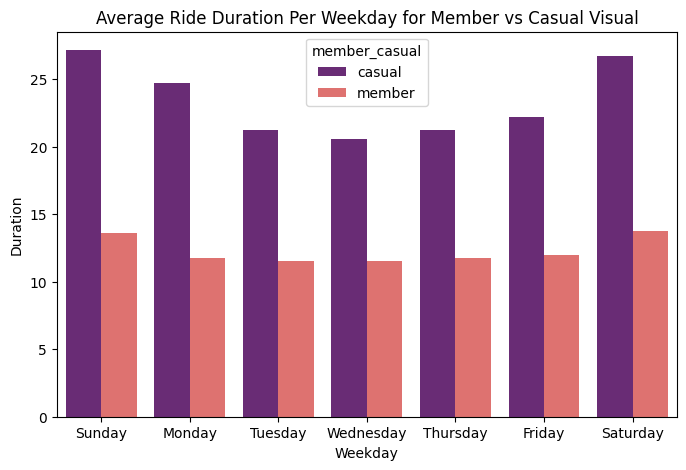

In [39]:
# Average ride duration per weekday for member vs casual Visual

#Plot
plt.figure(figsize=(8,5))
sns.barplot(data=bike_datavis1,x="weekday",y="duration",hue = "member_casual",palette = "magma")
sns.set_theme(style="whitegrid")


## Set Labels and Title
plt.title("Average Ride Duration Per Weekday for Member vs Casual Visual")
plt.xlabel("Weekday")
plt.ylabel("Duration")

#### Based on this visual you can clearly see the that casual riders tend to ride for a much longer duration. Also between both comparisons, ride duration tend to be longer on the weekends and shorter during the weekdays.

### Visual 2

Text(0.5, 1.0, 'Average Duration Member vs Casual')

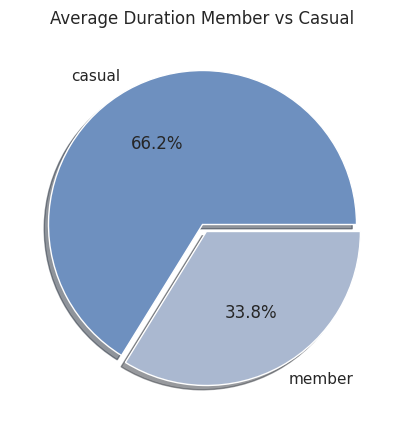

In [40]:
# Average duration member vs casual

#Plot
plt.figure(figsize =(5,5))
plt.pie(
    bike_datavis2["duration"],
    labels=bike_datavis2["member_casual"],
    autopct = "%1.1f%%",
    explode=[0,0.052],
    shadow = True,
colors = sns.color_palette("vlag"))

#Set labels and Title
plt.title("Average Duration Member vs Casual")


#### A clear view in the difference between the average duration in casual riders vs members. Looking at the pie chart, there's is alot of opportunity to convert the casual riders into annual paying members.

### Visual 3

Text(0, 0.5, 'Duration')

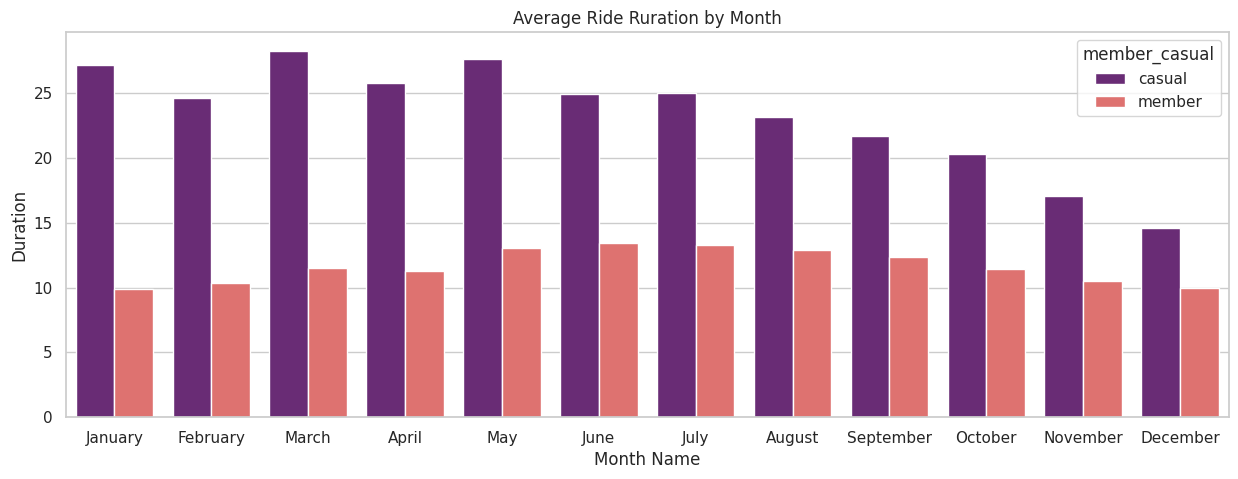

In [41]:
# Average ride duration by month

# Plot
plt.figure(figsize=(15,5))
sns.barplot(data=bike_datavis3, 
             x="month_name", 
             y="duration",
             hue="member_casual",
             palette="magma")

sns.set_theme(style="whitegrid")


# Set Labels and Title
plt.title("Average Ride Ruration by Month")
plt.xlabel("Month Name")
plt.ylabel("Duration")


#### What I find interesting in this barplot is during the coldest months,casual riders tend to make a dip from the hotter months while the annnual members tend to dip slightly.

### Visual 4

Text(0, 0.5, 'Ride Count')

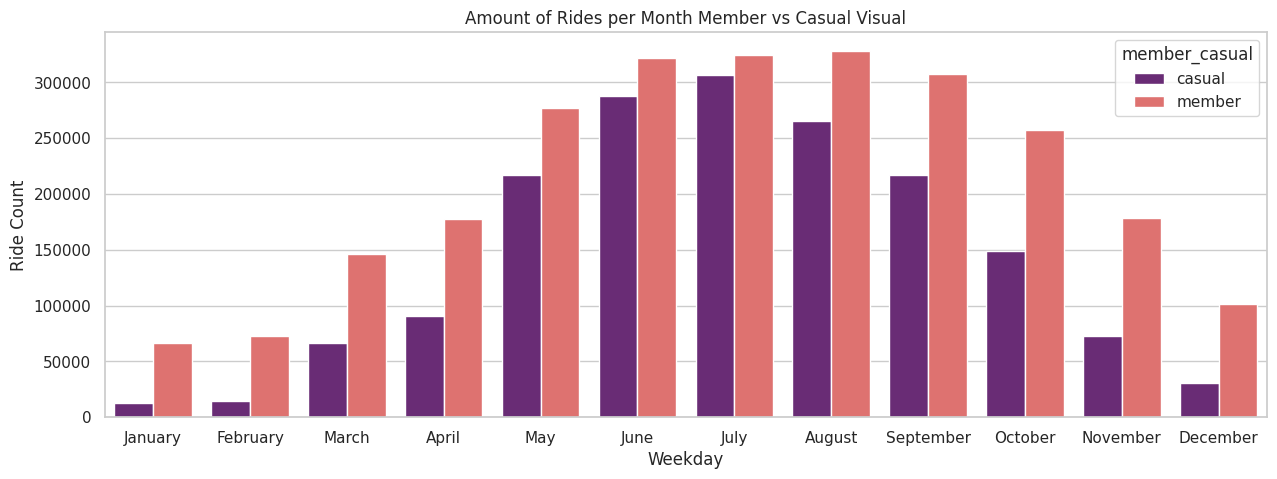

In [42]:
# The amount of rides per month member vs casual

#Plot
plt.figure(figsize=(15,5))
sns.barplot(data=bike_datavis4,x="month_name",y="ride_id",hue = "member_casual",palette = "magma")
sns.set_theme(style="darkgrid")

## Set Labels and Title
plt.title("Amount of Rides per Month Member vs Casual Visual")
plt.xlabel("Weekday")
plt.ylabel("Ride Count")

#### This is my favorite visual of this study because this shows where most of the activity is during the year. Which is as expected, during the Summer.

## Visual 5

Text(0.5, 0, 'Member vs Casual')

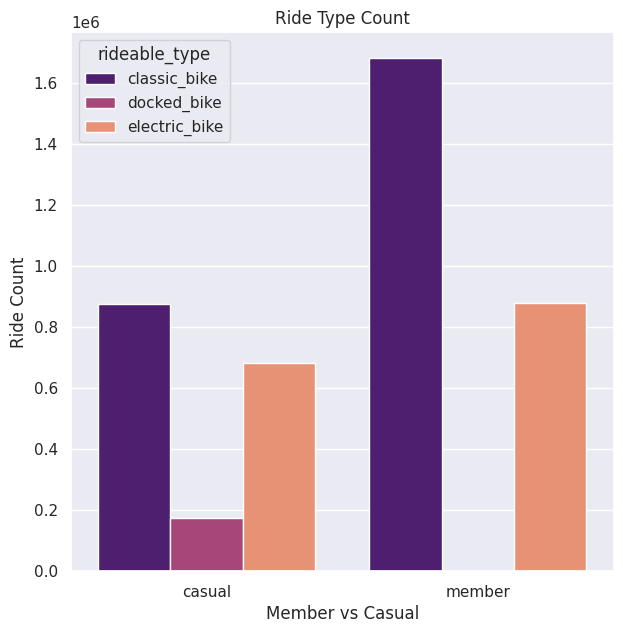

In [43]:
# Count of ride type for member vs casual

#Plot
plt.figure(figsize=(7,7))
sns.barplot(data=bike_datavis5,x="member_casual",y="ride_id",hue = "rideable_type",palette = "magma")
sns.set_theme(style="darkgrid")

## Set Labels and Title
plt.title("Ride Type Count")
plt.ylabel("Ride Count")
plt.xlabel("Member vs Casual")


#### Annual members never used the "docked_bike". This is just a visual to what bike type does the groups favor.

# Phase 6 - Act

### Guiding questions


* **What is your final conclusion based on your analysis?**

  My final conlcuison is that casual riders use the bike service more than the annual members, the classic bike is the most used, and there is more     bike usage during the Summer amongst both groups.

* **How could your team and business apply your insights?**
    
    They could apply the insights to learn more about how the service is used.

* **What next steps would you or your stakeholders take based on your findings?**
    
    Next steps would be to come up with a marketing strategy towards the casual riders using the info learned from the insights.

* **Is there additional data you could use to expand on your findings?**
    
    Additional data that could be used to expand insights is city, state, and demographic information.

### Recommendations

1. Create social media content to show the benefits of Cyclistic. I recommend heavy marketing during the Summer since that's when the company has the most activity.

2. Explain the money that'd be saved if casual members were to sign up as annual paying members.

3. Create a promotion such as "Join now for $10" as sn example to attract more annual members. Also add extra benefits such as 1 free ride per month as a new annual member.